### Exercises

In [1]:
import numpy as np

In [2]:
x = np.random.random((3, 4))
x

array([[0.85918688, 0.30205207, 0.81445851, 0.14344062],
       [0.83957866, 0.65364746, 0.39171783, 0.92738311],
       [0.11996219, 0.77148236, 0.37329794, 0.38967974]])

Print max, min and mean of array, with numpy. 
Use axis=0 in order to move by cols, axis=1 to move by rows.

In [3]:
x.max()

0.9273831123903264

In [4]:
x.min()

0.11996219361423821

In [5]:
x.mean()

0.5488239478506217

In [6]:
x.max(axis=0)

array([0.85918688, 0.77148236, 0.81445851, 0.92738311])

In [7]:
x.max(axis=1)

array([0.85918688, 0.92738311, 0.77148236])

500 coin toss simulations:

In [11]:
x = np.random.binomial(500, .5)
print("number of heads:", x)

number of heads: 245


Repeat coin toss simulation 500 times, and plot n. of heads.

In [14]:
n_heads = []
for i in range(500):
    n_heads.append(np.random.binomial(500, .5))
n_heads[:5]

[246, 265, 258, 262, 238]

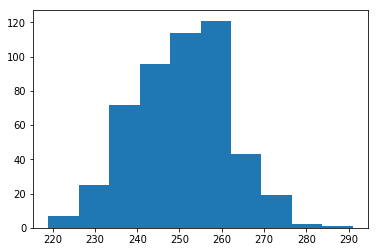

In [15]:
import matplotlib.pyplot as plt  
%matplotlib inline 

plt.hist(n_heads)
plt.show()

### Monty Hall Problem simulation

In [57]:
# this function simulates the winning prize position, for nsim simulations
def simulate_prizedoors(nsim):
    answer = []
    for i in range(nsim):
        answer.append(np.random.randint(0,3))
    return answer

simulate_prizedoor(10)

[0, 2, 0, 0, 1, 1, 1, 2, 1, 2]

In [58]:
# this function simulates the guessed position, for nsim simulations
def simulate_guesses(nsim):
    guess = []
    for i in range(nsim):
        guess.append(np.random.randint(0,3))
    return guess

simulate_guesses(10)

[1, 1, 1, 0, 1, 0, 2, 2, 2, 1]

In [59]:
# this function simulates the pick of a door, which is not prizedoor or guess
def goat_doors(prizedoors, guesses):
    nsim = len(prizedoors)
    goatdoor = []
    
    for i in range(nsim):
        not_intersect = list(set([0,1,2]) ^ set([prizedoors[i], guesses[i]])) # finds not intersection
        goatdoor.append(not_intersect[0]) # pick first avaiable door
    return goatdoor

goat_doors(simulate_prizedoors(10), simulate_guesses(10))

[1, 1, 0, 1, 1, 1, 2, 0, 2, 1]

In [60]:
# this function simulates the pick of a second door, which is not guess or opened goat door
def switch_guess(guesses, goatdoor):
    nsim = len(guesses)
    newguess = []
    
    for i in range(nsim):
        not_intersect = list(set([0,1,2]) ^ set([guesses[i], goatdoor[i]])) # finds not intersection
        newguess.append(not_intersect[0]) # pick first avaiable door
    return newguess

switch_guess(simulate_guesses(10), goat_doors(simulate_prizedoors(10), simulate_guesses(10)))

[0, 1, 2, 1, 1, 2, 0, 2, 0, 0]

In [61]:
# this function gets the percentage of wins, in nsim simulations
def win_percentage(guesses, prizedoors):
    nsim = len(guesses)
    win_count = 0
    for i in range(nsim):
        if guesses[i] == prizedoors[i]:
            win_count += 1
    return win_count/nsim * 100

win_percentage(np.array([0, 1, 2]), np.array([0, 0, 0]))

33.33333333333333

In [66]:
nsim  = 10000 
# two strategies: 1-keeps the door picked, 2-switches the door picked
guesses = simulate_guesses(nsim)
prizedoors = simulate_prizedoors(nsim)
secondguesses = switch_guess(guesses, goat_doors(prizedoors, guesses))

keep_first_door = win_percentage(guesses, prizedoors)

switch_first_door = win_percentage(secondguesses, prizedoors)

print("Percentage of wins without changing door: ", keep_first_door)
print("Percentage of wins with switching door: ", switch_first_door)

Percentage of wins without changing door:  33.589999999999996
Percentage of wins with switching door:  66.41


Has expected the percentage of wins when you switch door is indeed higher.